## find things
* correlation
* pie charts
* try to infer using logistic regression



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#reading csv file
df =pd.read_csv("Geophagy.csv")

In [3]:
#take a peek at the data
df.head()

,eat soil,start_age,frequency,get_soil,reason_for_eating,know_eater,eater_reason,eater_kind,gender,Notes
0,No,NaN,NaN,NaN,NaN,No,NaN,NaN,M,NaN
1,yes,young age,once,NaN,bandwagon,yes,wierd appetite,pregnant women,M,NaN
2,yes,young age,rarely,"termite mould, bare ground",crave,yes,baby to grow,"pregnant women, girls",F,"eat in rainy season,"
3,No,NaN,NaN,NaN,NaN,yes,tastes nice\n,"pregnant women, girls",M,"Village shit,\nHeard in a taxi it helps with f..."
4,yes,young age,once,market,bandwagon,yes,NaN,pregnant women,M,NaN


In [4]:
#dimension of data
df.shape

(25, 10)

In [5]:
#get columns in our data
df.columns.values

array(['eat soil', 'start_age', 'frequency', 'get_soil',
       'reason_for_eating', 'know_eater', 'eater_reason', 'eater_kind',
       'gender', 'Notes'], dtype=object)

In [6]:
#get datatypes
df.dtypes

eat soil             object
start_age            object
frequency            object
get_soil             object
reason_for_eating    object
know_eater           object
eater_reason         object
eater_kind           object
gender               object
Notes                object
dtype: object

In [7]:
#getting political parties
df["eater_reason"].unique()

array([nan, 'wierd appetite', 'baby to grow', 'tastes nice\n',
       'Learnt from their peer when little now addicted',
       'eating disorder', 'craviing', 'for nutrients, iron', 'no idea',
       'The attractive scent', 'smell', 'They love its taste and scent',
       'craving', 'It tastes good', 'it smells good'], dtype=object)

In [8]:
#plot data
#fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['gender']).count()

,eat soil,start_age,frequency,get_soil,reason_for_eating,know_eater,eater_reason,eater_kind,Notes
gender,,,,,,,,,
F,17,9,9,9,9,17,15,16,5
M,8,3,2,1,3,8,3,5,2


<AxesSubplot:>

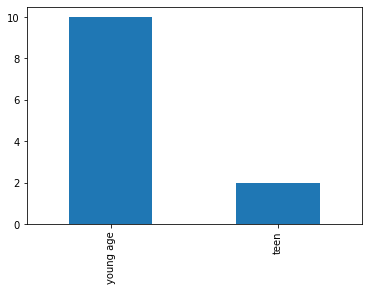

In [9]:
df['start_age'].value_counts().plot(kind='bar')

<AxesSubplot:>

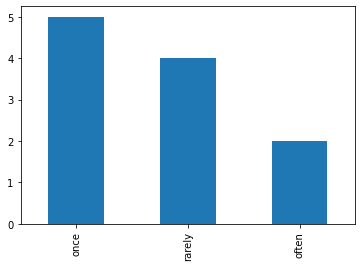

In [10]:
df['frequency'].value_counts().plot(kind='bar')

<AxesSubplot:>

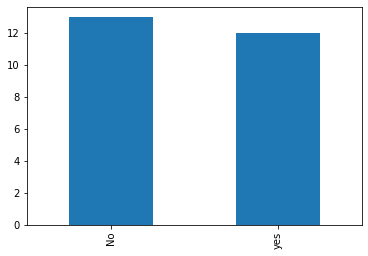

In [11]:
df['eat soil'].value_counts().plot(kind='bar')

<AxesSubplot:>

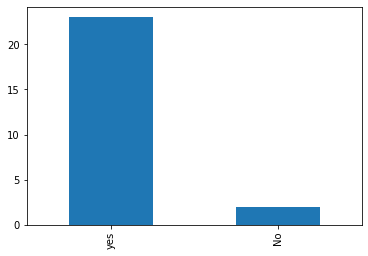

In [12]:
df['know_eater'].value_counts().plot(kind='bar')

In [13]:
from wordcloud import WordCloud, STOPWORDS

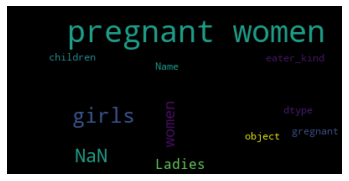

In [14]:
# Start with one review:
text = str(df.eater_kind)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
# rename misspelt words
df["eater_kind"].replace({"gregnant": "pregnant"}, inplace=True)

In [16]:
#create using string
text = " ".join(str(eater) for eater in df.eater_reason )
text

'nan wierd appetite baby to grow tastes nice\n nan Learnt from their peer when little now addicted nan eating disorder nan craviing for nutrients, iron nan no idea The attractive scent smell They love its taste and scent craving It tastes good it smells good craving craving craving craving nan nan'

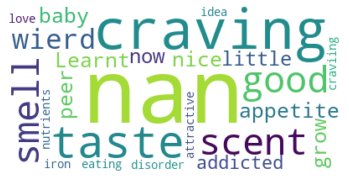

In [17]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["the", "it", "to", "its", "they"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

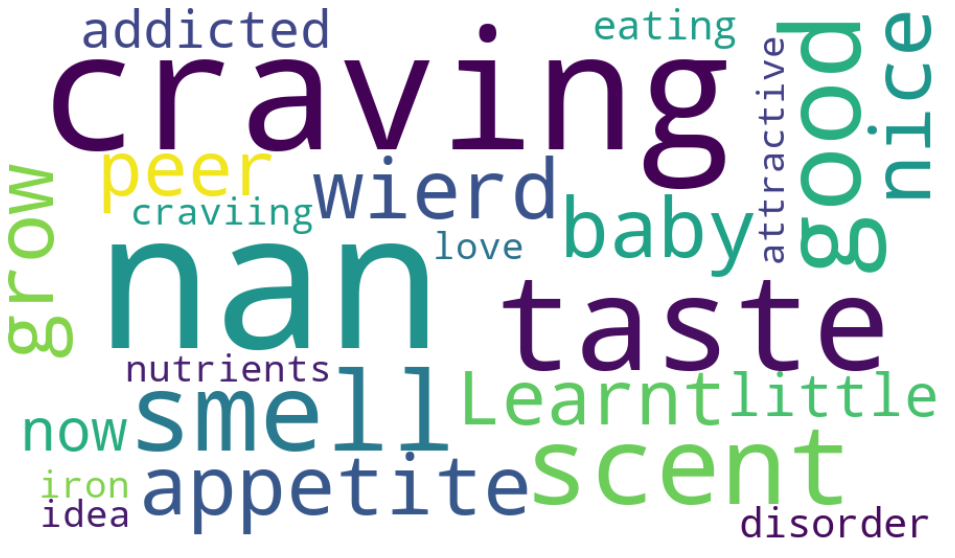

In [22]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_eat_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("its.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

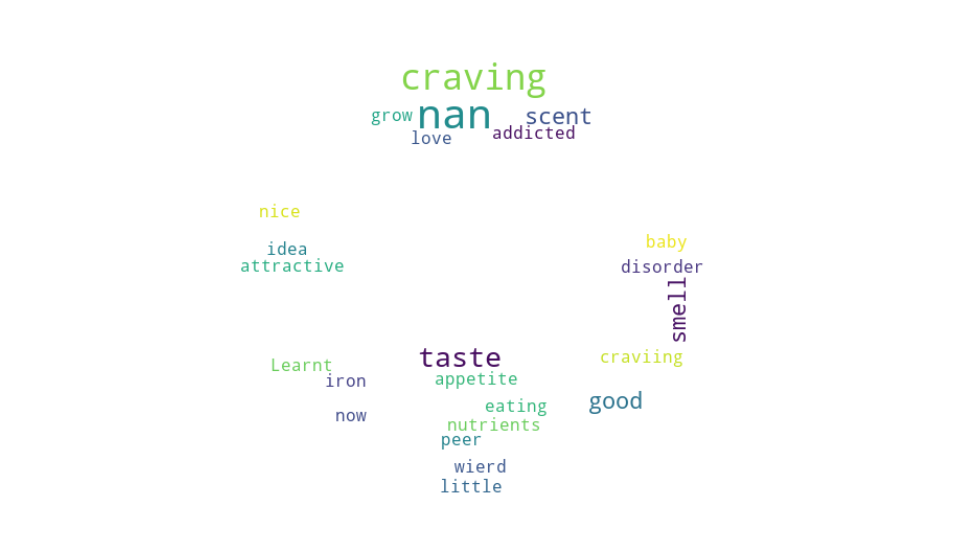

In [57]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
#d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
#text = open(path.join(d, 'alice.txt')).read()


# read the mask / color image taken from
# http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
eat_mask = Image.open("it.jpg")
alice_coloring = np.array(eat_mask)
stopwords = set(STOPWORDS)
stopwords.add("it")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
               stopwords=stopwords, max_font_size=40, random_state=10)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

wc.to_file("its.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig("plate.png")
plt.show()

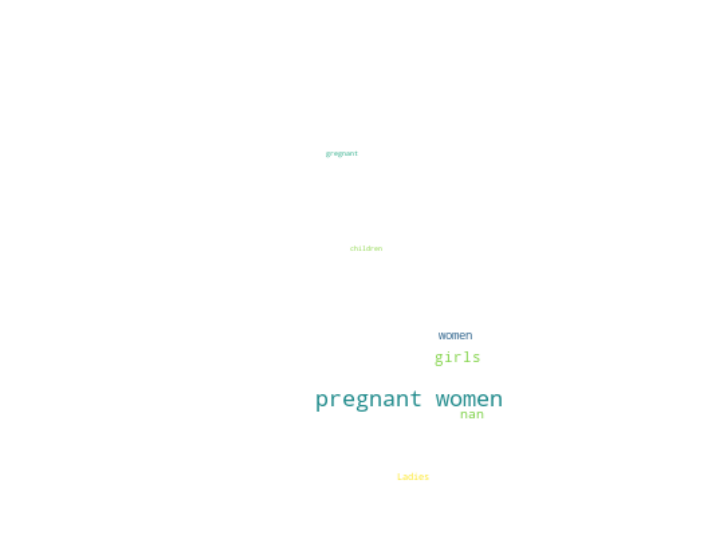

In [59]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
#d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
#text = open(path.join(d, 'alice.txt')).read()

# read the mask / color image taken from
# http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
text1 = " ".join(str(eater) for eater in df.eater_kind )

eat_mask = Image.open("pregnant.png")
alice_coloring = np.array(eat_mask)
stopwords = set(STOPWORDS)
stopwords.add("it")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
               stopwords=stopwords, max_font_size=40, random_state=10)
# generate word cloud
wc.generate(text1)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

wc.to_file("pregnants.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
#plt.savefig("plate.png")
plt.show()

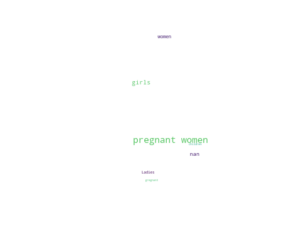

In [63]:
mask = np.array(Image.open('pregnant.png'))
wc = WordCloud(stopwords=STOPWORDS, 
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(text1)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [27]:
df.columns.values

array(['eat soil', 'start_age', 'frequency', 'get_soil',
       'reason_for_eating', 'know_eater', 'eater_reason', 'eater_kind',
       'gender', 'Notes'], dtype=object)

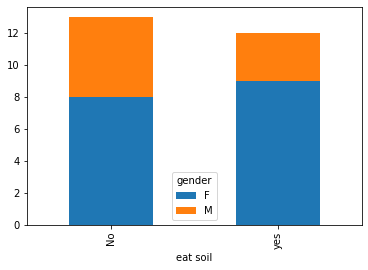

In [28]:
df.groupby(['eat soil','gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

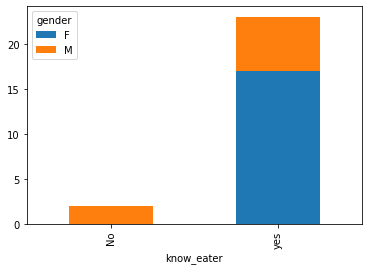

In [30]:
df.groupby(['know_eat','gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

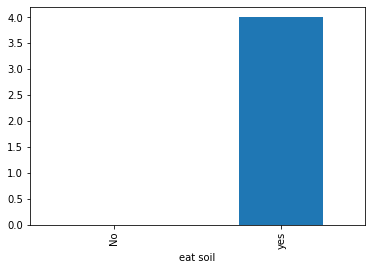

In [35]:
df.groupby('eat soil')['get_soil'].nunique().plot(kind='bar')
plt.show()

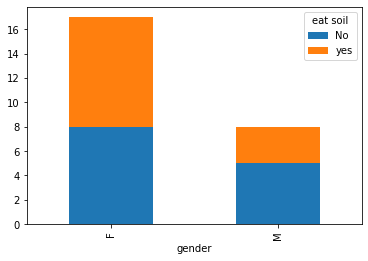

In [36]:
df.groupby(['gender','eat soil']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

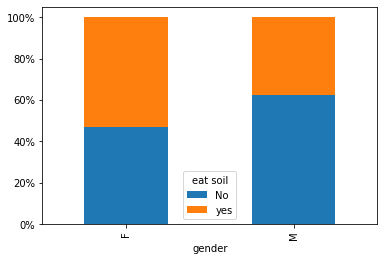

In [38]:
import matplotlib.ticker as mtick
df.groupby(['gender','eat soil']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [40]:
df.corr(method='pearson', min_periods=1)

""


In [41]:
df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,eat soil,start_age,frequency,get_soil,reason_for_eating,know_eater,eater_reason,eater_kind,gender,Notes
eat soil,1.000000,0.914307,0.798087,0.778329,0.714006,0.283315,0.040054,0.326538,0.144174,-0.055306
start_age,0.914307,1.000000,0.655841,0.822134,0.742494,0.259037,0.126541,0.236220,0.199074,-0.110766
frequency,0.798087,0.655841,1.000000,0.705915,0.829381,0.226110,0.305365,0.531763,0.352977,0.168814
get_soil,0.778329,0.822134,0.705915,1.000000,0.671896,0.220513,0.192134,0.438607,0.373585,-0.043047
reason_for_eating,0.714006,0.742494,0.829381,0.671896,1.000000,0.202289,0.492212,0.497686,0.378676,0.063347
know_eater,0.283315,0.259037,0.226110,0.220513,0.202289,1.000000,0.352672,0.277540,0.429863,-0.053754
eater_reason,0.040054,0.126541,0.305365,0.192134,0.492212,0.352672,1.000000,0.500279,0.686371,0.231135
eater_kind,0.326538,0.236220,0.531763,0.438607,0.497686,0.277540,0.500279,1.000000,0.484235,0.048159
gender,0.144174,0.199074,0.352977,0.373585,0.378676,0.429863,0.686371,0.484235,1.000000,0.162892
Notes,-0.055306,-0.110766,0.168814,-0.043047,0.063347,-0.053754,0.231135,0.048159,0.162892,1.000000


In [42]:
import seaborn as sn

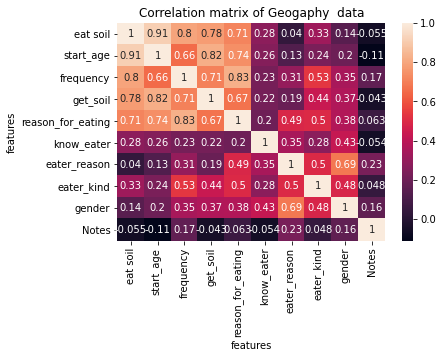

In [45]:
corrMatrix = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
sn.heatmap(corrMatrix, annot=True)


plt.title("Correlation matrix of Geogaphy  data")

plt.xlabel("features")

plt.ylabel("features")
plt.show()

In [46]:
correlation_mat = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

eat soil  eat soil             1.000000
          start_age            0.914307
          frequency            0.798087
          get_soil             0.778329
          reason_for_eating    0.714006
                                 ...   
Notes     know_eater          -0.053754
          eater_reason         0.231135
          eater_kind           0.048159
          gender               0.162892
          Notes                1.000000
Length: 100, dtype: float64


In [47]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

Notes       start_age   -0.110766
start_age   Notes       -0.110766
Notes       eat soil    -0.055306
eat soil    Notes       -0.055306
know_eater  Notes       -0.053754
                           ...   
get_soil    get_soil     1.000000
frequency   frequency    1.000000
start_age   start_age    1.000000
gender      gender       1.000000
Notes       Notes        1.000000
Length: 100, dtype: float64


In [48]:
negative_pairs = sorted_pairs[sorted_pairs < 0]

print(negative_pairs)

Notes       start_age    -0.110766
start_age   Notes        -0.110766
Notes       eat soil     -0.055306
eat soil    Notes        -0.055306
know_eater  Notes        -0.053754
Notes       know_eater   -0.053754
            get_soil     -0.043047
get_soil    Notes        -0.043047
dtype: float64


In [49]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

eater_kind         eater_reason         0.500279
eater_reason       eater_kind           0.500279
eater_kind         frequency            0.531763
frequency          eater_kind           0.531763
                   start_age            0.655841
start_age          frequency            0.655841
get_soil           reason_for_eating    0.671896
reason_for_eating  get_soil             0.671896
eater_reason       gender               0.686371
gender             eater_reason         0.686371
frequency          get_soil             0.705915
get_soil           frequency            0.705915
reason_for_eating  eat soil             0.714006
eat soil           reason_for_eating    0.714006
start_age          reason_for_eating    0.742494
reason_for_eating  start_age            0.742494
eat soil           get_soil             0.778329
get_soil           eat soil             0.778329
frequency          eat soil             0.798087
eat soil           frequency            0.798087
start_age          g

<AxesSubplot:>

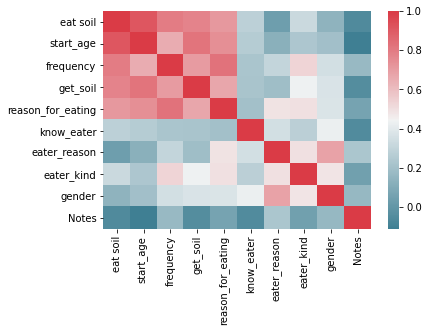

In [53]:
sn.heatmap(correlation_mat, xticklabels=correlation_mat.columns, yticklabels=correlation_mat.columns, cmap=sn.diverging_palette(220, 10, as_cmap=True))

Text(0, 0.5, 'Frequency of Purchase')

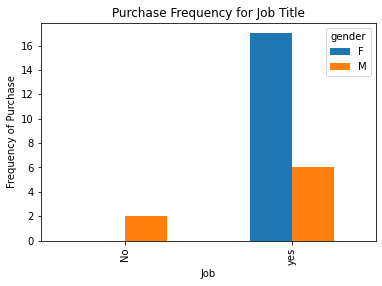

In [64]:
%matplotlib inline
pd.crosstab(df.know_eater,df.gender).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
#plt.savefig('purchase_fre_job')